# WOMEN IN DATA SCIENCE TEXAS DATATHON

## Problem statement

*Forecasting hourly electrical load in each zone in the short-term (the next 7 days).*

This year's challenge will focus on electricity load forecasting. Load forecasting is the predicting of electrical power required to meet the short or long-term demand. The forecasting helps utility companies plan on their capacity to keep the electricity running in every household and business.

You will build models to learn how the electrical load was inferenced by key factors (e.g., weather) using historical data and make the forecast to a near-future period.

<img src="https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercotWeatherZoneMap.png" alt="weather zone" width="400"/>

### More information - Visit [website](https://widstexas2021.github.io/datathon/)
---
Authors :
  - [Samaya Madhavan, Senior Software Engineer, IBM](https://www.linkedin.com/in/samaya-madhavan/)
---

This WiDS event series is brought to you by the following WiDS 2021 Texas ambassadors:

- <a href="https://www.linkedin.com/in/gaby-arellano-bello-8b485052/" target="_blank">Gaby Arellano Bello</a>, WiDS Dallas
- <a href="https://www.linkedin.com/in/pushkarkumarjain/" target="_blank">Pushkar Kumar Jain</a>, WiDS Houston
- <a href="https://www.linkedin.com/in/samaya-madhavan/" target="_blank">Samaya Madhavan</a>, WiDS Dallas
- <a href="https://www.linkedin.com/in/lindabrewstermeffert/" target="_blank">Linda Brewster Meffert</a>, WiDS San Antonio
- <a href="https://www.linkedin.com/in/joanneti/" target="_blank">Jo-Anne Ting</a>, WiDS Houston
- <a href="https://www.linkedin.com/in/liliana-torres-68009435/" target="_blank">Liliana Torres</a>, WiDS Dallas
- <a href="https://www.linkedin.com/in/tailaiwen/" target="_blank">Tailai Wen</a>, WiDS Dallas

## SESSION 1 - DATA PREPROCESSING USING PYTHON AND PANDAS

### What is data preprocessing? 

Process of converting raw data into useful format.

![ML-steps](https://raw.githubusercontent.com/samayamadhavan/datathon/main/assets/images/machine-learning-steps.png)



## Content

1. Install and import Python libraries
1. Process historical hourly electrical load data in each each ERCOT zone
1. Process historical tri-hourly weather dataset in major cities across ERCOT zone
1. Combine electrical load data and weather data

## 1. Install and import Python libraries

### What is pandas? 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [1]:
!pip install --upgrade pandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: pandas in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.2.4)


In [2]:
import pandas as pd
pd.__version__

'1.2.4'

In [3]:
import os, types
import io, requests
from datetime import datetime

In [4]:
import matplotlib.pyplot as plt

## 2. Process historical hourly electrical load data in each each ERCOT zone

The load on the grid varies based on a very large number of factors. Some of the most significant are:

1. Time of Day: More electricity is used at times when people are most active
1. Weather: More electricity is used during the warmer months, due to air-conditioning units

### ERCOT Hourly Power Load 

* ercot_hourly_load.csv: Includes hourly power load in the eight ERCTO weather zones. The most recent few weeks of data is from ERCOT Actual System Load, while earlier data is from ERCOT Load Data Archives.
* weather_zone_cities.json lists all Texas cities in each ERCTO weather zone.
* weather_zone_counties.json lists all Texas counties in each ERCTO weather zone.

### 2.1 Import dataset from github using Pandas

This dataset is located on the [GitHub repository](https://github.com/WiDSTexas2021/datathon-code).

In [5]:
url = "https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercot_hourly_load.csv"
s=requests.get(url).content
ercot_hourly_df =pd.read_csv(io.StringIO(s.decode('utf-8')))

### 2.2 - Data exploration



In [6]:
ercot_hourly_df.columns

Index(['Hour_Ending', 'Coast', 'East', 'Far West', 'North', 'North Central',
       'South', 'South Central', 'West'],
      dtype='object')

In [7]:
ercot_hourly_df.head()

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West
0,2005-01-01 01:00:00-06:00,7507.810731,850.313988,998.465500,741.963778,7312.259820,1883.979457,3728.400885,692.294503
1,2005-01-01 02:00:00-06:00,7257.549136,818.143264,987.532852,711.996586,7012.466197,1798.234153,3562.614723,675.176013
2,2005-01-01 03:00:00-06:00,6973.987199,783.396624,978.575662,687.881144,6712.807281,1712.758395,3373.868049,659.650453
3,2005-01-01 04:00:00-06:00,6794.489296,760.639635,959.486947,673.419383,6502.378446,1651.210254,3239.047417,648.512894
4,2005-01-01 05:00:00-06:00,6685.186677,743.371691,955.268590,664.792118,6440.559639,1627.872766,3176.859720,647.001780


In [8]:
ercot_hourly_df.dtypes

Hour_Ending       object
Coast            float64
East             float64
Far West         float64
North            float64
North Central    float64
South            float64
South Central    float64
West             float64
dtype: object

In [9]:
ercot_hourly_df['Hour_Ending'].dtype

dtype('O')

In [10]:
ercot_hourly_describe = ercot_hourly_df.describe()
ercot_hourly_describe

,Coast,East,Far West,North,North Central,South,South Central,West
count,143878.000000,143878.000000,143878.000000,143878.000000,143878.000000,143878.000000,143878.000000,143878.000000
mean,11011.460895,1408.221155,1953.333631,913.903148,12638.883853,3064.075885,6310.505177,1082.895221
std,2633.123964,333.998330,855.880495,256.491412,3491.653560,840.689160,1723.116596,251.948155
min,1702.829343,737.857378,872.014264,488.272293,6211.523935,1351.410393,3055.595655,571.771569
25%,9121.687672,1175.307917,1259.292728,731.136669,10233.660525,2437.116912,5102.566891,899.936086
50%,10463.922576,1336.979737,1658.667491,846.738274,11799.360605,2920.143885,5906.247172,1041.164308
75%,12454.350681,1589.585025,2393.879714,1037.255690,14418.219313,3557.664543,7222.887249,1223.143882
max,21256.115190,2949.198517,4438.851497,2305.722761,26499.240955,6192.252947,14166.701623,2117.399078


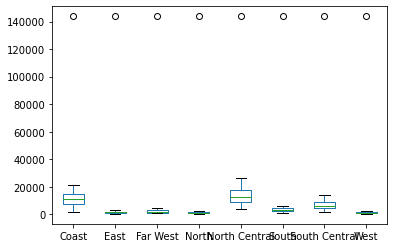

In [11]:
ercot_hourly_describe.plot.box()

### 2.3 Handle missing data

In [12]:
ercot_hourly_df.isna().any()

Hour_Ending      False
Coast             True
East              True
Far West          True
North             True
North Central     True
South             True
South Central     True
West              True
dtype: bool

In [13]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West
103871,2016-11-07 00:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ercot_hourly_df = ercot_hourly_df.fillna(method='ffill')

In [15]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West


### 2.4 - datetime - change from *offset-aware* to *offset-naive*

What is a time series dataset? - Data collected at different point in time over even intervals. 

*A timezone's offset refers to how many hours the timezone is from Coordinated Universal Time (UTC).*




In [16]:
ercot_hourly_df['Hour_Ending']

0         2005-01-01 01:00:00-06:00
1         2005-01-01 02:00:00-06:00
2         2005-01-01 03:00:00-06:00
3         2005-01-01 04:00:00-06:00
4         2005-01-01 05:00:00-06:00
                    ...            
143874    2021-05-31 20:00:00-05:00
143875    2021-05-31 21:00:00-05:00
143876    2021-05-31 22:00:00-05:00
143877    2021-05-31 23:00:00-05:00
143878    2021-06-01 00:00:00-05:00
Name: Hour_Ending, Length: 143879, dtype: object

### Example 1 - '2005-01-01 01:00:00-05:00'

In [17]:
time_type_1 = '2005-01-01 01:00:00-05:00'


#parse time string into a time object in a specified format. 
dt_1 = datetime.strptime(time_type_1, '%Y-%m-%d %H:%M:%S%z')

#print time and timezone name
print('time before conversion :' ,dt_1) 
print('time zone in offset-aware format :' ,dt_1.tzname()) 
print()

#convert time into timestamp
timestamp_1 = dt_1.timestamp()
print('time converted to timestamp : ', timestamp_1)
print()

date_from_timestamp_1 = datetime.fromtimestamp(timestamp_1)
#d = date_timestamp_1.strftime("%m/%d/%Y, %H:%M:%S")
print('time after conversion :' ,date_from_timestamp_1)
print('time zone in offset-naive format :' ,date_from_timestamp_1.tzname()) 



time before conversion : 2005-01-01 01:00:00-05:00
time zone in offset-aware format : UTC-05:00

time converted to timestamp :  1104559200.0

time after conversion : 2005-01-01 06:00:00
time zone in offset-naive format : None


### Example 2 - '2005-01-01 01:00:00-06:00'

In [18]:
time_type_2 = '2005-01-01 01:00:00-06:00'

#parse time string into a time object in a specified format. 
dt_2 = datetime.strptime(time_type_2, '%Y-%m-%d %H:%M:%S%z')

#print time and timezone name
print('time before conversion :' ,dt_2) 
print('time zone in offset-aware format :' ,dt_2.tzname()) 
print()

#convert time into timestamp
timestamp_2 = dt_2.timestamp()
print('time converted to timestamp : ', timestamp_2)
print()

date_from_timestamp_2 = datetime.fromtimestamp(timestamp_2)

print('time after conversion :' ,date_from_timestamp_2)
print('time zone in offset-naive format :' ,date_from_timestamp_2.tzname()) 



time before conversion : 2005-01-01 01:00:00-06:00
time zone in offset-aware format : UTC-06:00

time converted to timestamp :  1104562800.0

time after conversion : 2005-01-01 07:00:00
time zone in offset-naive format : None


In [19]:
ercot_hourly_df['Hour_Ending_Naive'] = ercot_hourly_df['Hour_Ending'].apply(lambda x: datetime.fromtimestamp(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S%z').timestamp()))
#.strftime("%m/%d/%Y, %H:%M:%S")

In [20]:
ercot_hourly_df = ercot_hourly_df.drop(['Hour_Ending'],axis=1)

In [21]:
ercot_hourly_df['Hour_Ending_Naive']

0        2005-01-01 07:00:00
1        2005-01-01 08:00:00
2        2005-01-01 09:00:00
3        2005-01-01 10:00:00
4        2005-01-01 11:00:00
                 ...        
143874   2021-06-01 01:00:00
143875   2021-06-01 02:00:00
143876   2021-06-01 03:00:00
143877   2021-06-01 04:00:00
143878   2021-06-01 05:00:00
Name: Hour_Ending_Naive, Length: 143879, dtype: datetime64[ns]

### 2.5 . Index and filter datetime column to match with historical weather dataset 

In [22]:
ercot_hourly_df = ercot_hourly_df.set_index(['Hour_Ending_Naive'])

In [23]:
print(len(ercot_hourly_df))

143879


In [24]:
starting_timestamp = '2008-07-01 00:00:00'
ending_timestamp = ercot_hourly_df.index[-1]
print(ending_timestamp)
ercot_hourly_df = ercot_hourly_df[pd.Timestamp(starting_timestamp):pd.Timestamp(ending_timestamp)]

2021-06-01 05:00:00


In [25]:
ercot_hourly_df.head(30)

,Coast,East,Far West,North,North Central,South,South Central,West
Hour_Ending_Naive,,,,,,,,
2008-07-01 00:00:00,14636.792617,1834.893991,1407.081587,1718.920291,17452.218597,3725.380524,9402.117510,1152.332422
2008-07-01 01:00:00,14143.251055,1772.966737,1408.005947,1647.615128,16531.112491,3554.510429,9044.579292,1123.386233
2008-07-01 02:00:00,13818.196398,1697.195008,1388.808365,1561.924284,15630.586123,3484.967078,8758.580012,1087.910917
2008-07-01 03:00:00,13372.853879,1607.313026,1380.070684,1527.516833,15233.563706,3415.020012,8580.818978,1075.904917
2008-07-01 04:00:00,12386.530845,1466.076119,1334.339634,1400.934504,13925.950362,3222.573761,7948.203079,1009.420380
2008-07-01 05:00:00,11382.287900,1355.577310,1248.461630,1238.439970,12407.476000,2946.577600,7152.954670,916.192670
2008-07-01 06:00:00,10233.975699,1280.929579,1210.183411,1130.739664,11277.215516,2724.392422,6509.912685,872.596686
2008-07-01 07:00:00,9656.662104,1221.128539,1178.877662,1050.738480,10468.390522,2574.735312,6094.321351,829.419681
2008-07-01 08:00:00,9253.200129,1172.281951,1154.309255,991.552786,9917.421758,2443.014223,5801.818915,798.814534


In [26]:
print(len(ercot_hourly_df))

113238


### 2.6 Visualize data 

Text(0.5, 1.0, 'West')

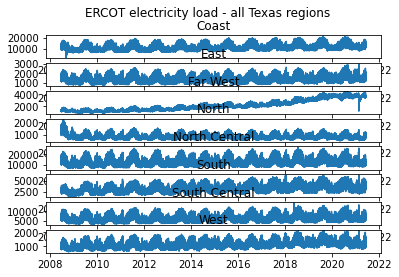

In [27]:
fig, axs = plt.subplots(8)
fig.suptitle('ERCOT electricity load - all Texas regions')
axs[0].plot(ercot_hourly_df.index,ercot_hourly_df['Coast'])
axs[0].set_title("Coast")
axs[1].plot(ercot_hourly_df.index,ercot_hourly_df['East'])
axs[1].set_title("East")
axs[2].plot(ercot_hourly_df.index,ercot_hourly_df['Far West'])
axs[2].set_title("Far West")
axs[3].plot(ercot_hourly_df.index,ercot_hourly_df['North'])
axs[3].set_title("North")
axs[4].plot(ercot_hourly_df.index,ercot_hourly_df['North Central'])
axs[4].set_title("North Central")
axs[5].plot(ercot_hourly_df.index,ercot_hourly_df['South'])
axs[5].set_title("South")
axs[6].plot(ercot_hourly_df.index,ercot_hourly_df['South Central'])
axs[6].set_title("South Central")
axs[7].plot(ercot_hourly_df.index,ercot_hourly_df['West'])
axs[7].set_title("West")


In [28]:
ercot_hourly_df.drop(ercot_hourly_df.columns.difference(['Coast']), 1, inplace=True)

In [29]:
 ercot_hourly_df.head()

,Coast
Hour_Ending_Naive,
2008-07-01 00:00:00,14636.792617
2008-07-01 01:00:00,14143.251055
2008-07-01 02:00:00,13818.196398
2008-07-01 03:00:00,13372.853879
2008-07-01 04:00:00,12386.530845


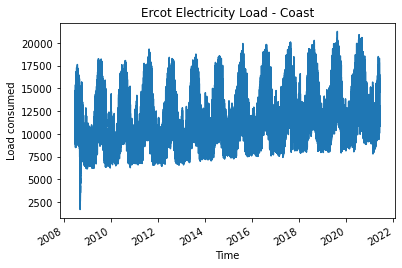

In [30]:
plt.figure(1)
plt.plot(ercot_hourly_df['Coast'])
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - Coast')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

### 2.7 download formated dataset as csv

In [31]:
ercot_hourly_df.to_csv('ercot_iso_hourly_load.csv', index=True)

## 3. Process historical tri-hourly weather dataset in major cities across ERCOT zone

### Access and process weather data

* weather_history.csv includes past weather data of 10 cities cross the 8 ECROT weather zones. The data is from World Weather Online and reported every 3 hours starting from July 1, 2008.
* weather_forecast.csv includes weather forecast of 10 cities cross the 8 ECROT weather zones. The data is from World Weather Online and forecast every 3 hours in the next 13 days (including today).

### 3.1 Import dataset from github using Pandas

In [32]:
import os, types
import pandas as pd
import io, requests

url = "https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/weather_history.csv"

s=requests.get(url).content
weather_history_df =pd.read_csv(io.StringIO(s.decode('utf-8')))



### 3.2 data exploration

In [33]:
weather_history_df.head()

,date,time,city,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,...,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex
0,2008-07-01,0,Abilene,21,70,4,7,173,S,113,...,76,14,57,21,70,9,15,21,70,1
1,2008-07-01,0,Austin,25,77,6,9,103,ESE,176,...,80,17,63,25,77,11,18,26,80,1
2,2008-07-01,0,Brownsville,26,79,5,8,150,SSE,113,...,84,23,74,26,79,9,14,29,84,1
3,2008-07-01,0,Corpus Christi,26,78,8,12,146,SE,113,...,83,23,73,26,78,13,21,28,83,1
4,2008-07-01,0,Dallas,25,76,6,9,149,SSE,113,...,78,12,54,25,76,11,18,25,78,1


In [34]:
weather_history_df.columns

Index(['date', 'time', 'city', 'tempC', 'tempF', 'windspeedMiles',
       'windspeedKmph', 'winddirDegree', 'winddir16Point', 'weatherCode',
       'weatherDesc', 'precipMM', 'precipInches', 'humidity', 'visibility',
       'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover',
       'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC',
       'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC',
       'FeelsLikeF', 'uvIndex'],
      dtype='object')

In [35]:
weather_history_df.dtypes

date                object
time                 int64
city                object
tempC                int64
tempF                int64
windspeedMiles       int64
windspeedKmph        int64
winddirDegree        int64
winddir16Point      object
weatherCode          int64
weatherDesc         object
precipMM           float64
precipInches       float64
humidity             int64
visibility           int64
visibilityMiles      int64
pressure             int64
pressureInches       int64
cloudcover           int64
HeatIndexC           int64
HeatIndexF           int64
DewPointC            int64
DewPointF            int64
WindChillC           int64
WindChillF           int64
WindGustMiles        int64
WindGustKmph         int64
FeelsLikeC           int64
FeelsLikeF           int64
uvIndex              int64
dtype: object

<img src="https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercotWeatherZoneMap.png" alt="weather zone" width="500"/>

In [36]:
print(weather_history_df['city'].unique())

['Abilene' 'Austin' 'Brownsville' 'Corpus Christi' 'Dallas' 'Houston'
 'Midland' 'San Antonio' 'Tyler' 'Wichita Falls']


### 3.3 - Data transformation

In [37]:
print(weather_history_df['time'].unique())

[   0  300  600  900 1200 1500 1800 2100]


In [38]:
weather_history_df['time'] = weather_history_df['time'].apply(lambda x: str(x).zfill(4))

In [39]:
print(weather_history_df['time'].unique())

['0000' '0300' '0600' '0900' '1200' '1500' '1800' '2100']


In [40]:
weather_history_df['date_time'] = weather_history_df['date'] + ' ' + weather_history_df['time']
weather_history_df['date_time']  = weather_history_df['date_time'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H%M"))

In [41]:
weather_history_df = weather_history_df.drop(['date','time'],axis=1)

In [42]:
weather_history_df['date_time'] = weather_history_df['date_time'].apply(lambda x: datetime.fromtimestamp(x.timestamp()))
#2021-05-17 00:00:00

In [43]:
weather_history_df.head()

,city,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,weatherDesc,precipMM,...,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,date_time
0,Abilene,21,70,4,7,173,S,113,Clear,0.0,...,14,57,21,70,9,15,21,70,1,2008-07-01
1,Austin,25,77,6,9,103,ESE,176,Patchy rain possible,0.6,...,17,63,25,77,11,18,26,80,1,2008-07-01
2,Brownsville,26,79,5,8,150,SSE,113,Clear,0.0,...,23,74,26,79,9,14,29,84,1,2008-07-01
3,Corpus Christi,26,78,8,12,146,SE,113,Clear,0.0,...,23,73,26,78,13,21,28,83,1,2008-07-01
4,Dallas,25,76,6,9,149,SSE,113,Clear,0.0,...,12,54,25,76,11,18,25,78,1,2008-07-01


In [44]:
weather_history_df['date_time']

0        2008-07-01 00:00:00
1        2008-07-01 00:00:00
2        2008-07-01 00:00:00
3        2008-07-01 00:00:00
4        2008-07-01 00:00:00
                 ...        
377515   2021-06-02 21:00:00
377516   2021-06-02 21:00:00
377517   2021-06-02 21:00:00
377518   2021-06-02 21:00:00
377519   2021-06-02 21:00:00
Name: date_time, Length: 377520, dtype: datetime64[ns]

### 3.4 - Attribute selection

In [45]:
 weather_history_df.drop(weather_history_df.columns.difference(['date_time','city','tempF','FeelsLikeF']), 1, inplace=True)

In [46]:
weather_history_df = weather_history_df.set_index(['date_time'])

In [47]:
weather_history_df.head()

,city,tempF,FeelsLikeF
date_time,,,
2008-07-01,Abilene,70,70
2008-07-01,Austin,77,80
2008-07-01,Brownsville,79,84
2008-07-01,Corpus Christi,78,83
2008-07-01,Dallas,76,78


### 3.5 Data filtering

In [48]:
weather_history_df_Houston = weather_history_df[weather_history_df['city']=='Houston']

In [49]:
weather_history_df_Houston.head()

,city,tempF,FeelsLikeF
date_time,,,
2008-07-01 00:00:00,Houston,80,85
2008-07-01 03:00:00,Houston,75,78
2008-07-01 06:00:00,Houston,73,77
2008-07-01 09:00:00,Houston,83,86
2008-07-01 12:00:00,Houston,93,97


In [50]:
weather_history_df_Houston = weather_history_df_Houston.resample("1H").mean().ffill()

In [51]:
weather_history_df_Houston.head(12)

,tempF,FeelsLikeF
date_time,,
2008-07-01 00:00:00,80.0,85.0
2008-07-01 01:00:00,80.0,85.0
2008-07-01 02:00:00,80.0,85.0
2008-07-01 03:00:00,75.0,78.0
2008-07-01 04:00:00,75.0,78.0
2008-07-01 05:00:00,75.0,78.0
2008-07-01 06:00:00,73.0,77.0
2008-07-01 07:00:00,73.0,77.0
2008-07-01 08:00:00,73.0,77.0


In [52]:
weather_history_df_Houston.head(-12)

,tempF,FeelsLikeF
date_time,,
2008-07-01 00:00:00,80.0,85.0
2008-07-01 01:00:00,80.0,85.0
2008-07-01 02:00:00,80.0,85.0
2008-07-01 03:00:00,75.0,78.0
2008-07-01 04:00:00,75.0,78.0
...,...,...
2021-06-02 05:00:00,75.0,79.0
2021-06-02 06:00:00,75.0,79.0
2021-06-02 07:00:00,75.0,79.0


In [53]:
len(weather_history_df_Houston)

113278

### 3.6 Visualize data 

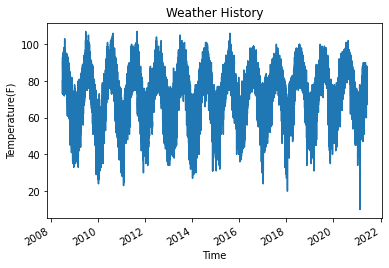

In [54]:
plt.plot(weather_history_df_Houston['tempF'])
plt.gcf().autofmt_xdate()
plt.title('Weather History')
plt.xlabel('Time')
plt.ylabel('Temperature(F)')
plt.show()

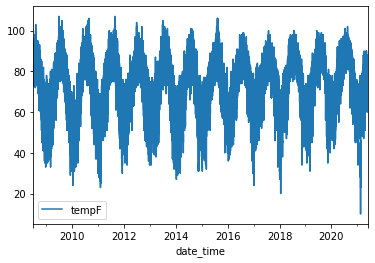

In [55]:
weather_history_df_Houston.plot(y='tempF')

### 3.7 download formated dataset as csv

In [56]:
weather_history_df_Houston.to_csv('weather_history.csv', index=True)

## 4. Combine electrical load data and weather data

In [57]:
coast_electricity_weather_hourly_df = ercot_hourly_df.join(weather_history_df_Houston)

In [58]:
coast_electricity_weather_hourly_df.head()

,Coast,tempF,FeelsLikeF
Hour_Ending_Naive,,,
2008-07-01 00:00:00,14636.792617,80.0,85.0
2008-07-01 01:00:00,14143.251055,80.0,85.0
2008-07-01 02:00:00,13818.196398,80.0,85.0
2008-07-01 03:00:00,13372.853879,75.0,78.0
2008-07-01 04:00:00,12386.530845,75.0,78.0


In [59]:
coast_electricity_weather_hourly_df.to_csv('electricity_weather_history.csv', index=True)

#  Session 2 - Time Series Forecasting using TensorFlow 2 in Python with RNN and LSTMs


## What is an Artificial Neural Network?  

Neural networks are computational structures that map an input to an output based on a network of highly connected processing elements (neurons).  

![ANN](https://developer.ibm.com/developer/default/articles/an-introduction-to-deep-learning/images/deep-neural-network.jpg)



<a id="top"></a>
### Table of Contents

1. [Data exploration - a refresher](#load_libraries)
1. [Prepare dataset for model training](#load_data)
1. [Build, test and evaluate time series forecasting model using Tensorflow and Keras](#prepare_data)



## 1. Data exploration - a refresher

#### We set the datetime field as index to make it easy to combine data from multiple sources. To make data more compatible for model building we first reset the index.

In [60]:
coast_electricity_weather_hourly_df.reset_index(inplace=True)

In [61]:
coast_electricity_weather_hourly_df.head()

,Hour_Ending_Naive,Coast,tempF,FeelsLikeF
0,2008-07-01 00:00:00,14636.792617,80.0,85.0
1,2008-07-01 01:00:00,14143.251055,80.0,85.0
2,2008-07-01 02:00:00,13818.196398,80.0,85.0
3,2008-07-01 03:00:00,13372.853879,75.0,78.0
4,2008-07-01 04:00:00,12386.530845,75.0,78.0


#### Next we verify that none of the entries in the *Hour_Ending_Naive* coulmn is missing or is repeating

In [62]:
print('Number of entries within the input dataframe : ',len(coast_electricity_weather_hourly_df))

print('Numbr of unique time entries in input dataframe: ',len(pd.unique(coast_electricity_weather_hourly_df['Hour_Ending_Naive'])))

Number of entries within the input dataframe :  113238
Numbr of unique time entries in input dataframe:  113238


#### We then perform a sanity check to understand the range of values that are present within our dataset

In [63]:
pd.concat([coast_electricity_weather_hourly_df.head(1), coast_electricity_weather_hourly_df.tail(1)])

,Hour_Ending_Naive,Coast,tempF,FeelsLikeF
0,2008-07-01 00:00:00,14636.792617,80.0,85.0
113237,2021-06-01 05:00:00,13063.040000,74.0,77.0


#### By executing the cell below, we understand that the last 30 entries of the dataset contains 6 hours of data from yesterday and 24 hours of data from day before yesterday.

In [64]:
coast_electricity_weather_hourly_df.tail(30)

,Hour_Ending_Naive,Coast,tempF,FeelsLikeF
113208,2021-05-31 00:00:00,14901.74,73.0,77.0
113209,2021-05-31 01:00:00,14308.93,73.0,77.0
113210,2021-05-31 02:00:00,14017.66,73.0,77.0
113211,2021-05-31 03:00:00,13706.21,71.0,71.0
113212,2021-05-31 04:00:00,13137.76,71.0,71.0
113213,2021-05-31 05:00:00,12498.53,71.0,71.0
113214,2021-05-31 06:00:00,11883.36,71.0,71.0
113215,2021-05-31 07:00:00,11386.99,71.0,71.0
113216,2021-05-31 08:00:00,11029.76,71.0,71.0
113217,2021-05-31 09:00:00,10839.05,75.0,79.0


## 2. Prepare data  for model building

### 2.1 Drop numpy incompatible column - *Hour_Ending_Naive*

Since data will be changed back and forth between numpy and pandas, we remove the *Hour_Ending_Naive* column to eliminate any datetime related confusion that may arise.

In [65]:
coast_electricity_weather = coast_electricity_weather_hourly_df.drop(['Hour_Ending_Naive'], axis=1)

### 2.2 Split data into training and test set 

We now split the dataset into training and test sets. 

#### We include all entries except the last 30 entries in the training set. 

In [66]:
training_data =  coast_electricity_weather.iloc[:-30]

In [67]:
print(len(training_data))

113208


#### We will eventually use the last 30 entries for evaluating the model. But we include an extra 24 rows to accomodate for calculating the timesteps. More details on it below.

In [68]:
test_data = coast_electricity_weather.iloc[-54:]

In [69]:
print(len(test_data))

54


### 2.3 Feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. (source : https://en.wikipedia.org/wiki/Feature_scaling)


In this section we use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from the scikit-learn's preprocessing API

In [70]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
training_data_scaled = min_max_scaler.fit_transform(training_data)

training_data_scaled = pd.DataFrame(training_data_scaled)

print('Value of training data : ' + str(training_data_scaled))

Value of training data :                0         1      2
0       0.661473  0.721649  0.680
1       0.636232  0.721649  0.680
2       0.619608  0.721649  0.680
3       0.596832  0.670103  0.624
4       0.546389  0.670103  0.624
...          ...       ...    ...
113203  0.658196  0.701031  0.640
113204  0.677809  0.701031  0.640
113205  0.691478  0.670103  0.624
113206  0.696823  0.670103  0.624
113207  0.692623  0.670103  0.624

[113208 rows x 3 columns]


In [72]:
test_data_scaled = min_max_scaler.transform(test_data)

test_data_scaled = pd.DataFrame(test_data_scaled)

print('Value of test data : ' + str(test_data_scaled))

Value of test data :            0         1      2
0   0.743052  0.618557  0.560
1   0.709913  0.618557  0.560
2   0.678962  0.618557  0.560
3   0.656494  0.597938  0.544
4   0.617520  0.597938  0.544
5   0.577731  0.597938  0.544
6   0.540755  0.587629  0.536
7   0.512445  0.587629  0.536
8   0.490418  0.587629  0.536
9   0.475621  0.597938  0.544
10  0.466982  0.597938  0.544
11  0.463746  0.597938  0.544
12  0.459411  0.659794  0.608
13  0.462593  0.659794  0.608
14  0.481136  0.659794  0.608
15  0.505787  0.721649  0.648
16  0.546737  0.721649  0.648
17  0.585532  0.721649  0.648
18  0.624592  0.701031  0.640
19  0.658196  0.701031  0.640
20  0.677809  0.701031  0.640
21  0.691478  0.670103  0.624
22  0.696823  0.670103  0.624
23  0.692623  0.670103  0.624
24  0.675023  0.649485  0.616
25  0.644705  0.649485  0.616
26  0.629809  0.649485  0.616
27  0.613880  0.628866  0.568
28  0.584809  0.628866  0.568
29  0.552117  0.628866  0.568
30  0.520656  0.628866  0.568
31  0.495270  0.628

### 2.4 Separate data into dependant and independant variables

We now split the training data into X_train to represent the dependent variables and y_train to represent the independent variable

In [73]:
X_train =  pd.DataFrame(training_data_scaled[[1, 2]])
y_train =  pd.DataFrame(training_data_scaled[0])

In [74]:
print(X_train.shape, y_train.shape)

(113208, 2) (113208, 1)


We then repeat the same steps for the test data

In [75]:
X_test =  pd.DataFrame(test_data_scaled[[1, 2]])
y_test =  pd.DataFrame(test_data_scaled[0])


In [76]:
print(X_test.shape, y_test.shape)

(54, 2) (54, 1)


### 2.5  Modify shape of train and test sets to include time steps

### What is Recurrent Neural Network ?

A recurrent neural network (RNN) is a class of neural networks that includes weighted connections within a layer (compared with traditional feed-forward networks, where connects feed only to subsequent layers). Because RNNs include loops, they can store information while processing new input. This memory makes them ideal for processing tasks where prior inputs must be considered (such as time-series data). 

![RNN](https://developer.ibm.com/developer/default/articles/cc-machine-learning-deep-learning-architectures/images/figure03.png)

#### Let's take a look at an example of data is expanded to include time steps history

| Electricity_Load  |
| -----:|
| 1345 |
     |   1456 |
 |    1444 |
  |    2000 |
   |    1245 |
   
   
   Let's assume time_step = 2
   
   | T1        | T2           | Electricity_Load  |
| ------------- |:-------------:| -----:|
| NA      | NA | 1345 |
|NA      | 1345      |   1456 |
| 1345 | 1456     |    1444 |
| 1456 | 1444     |    2000 |
|1444 | 2000      |    1245 |


In [79]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
        if(i%10000==0):
            print('i = ',i)
            print('i + time_steps = ',i+time_steps)
        
    return np.array(Xs), np.array(ys)

In [80]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train_steps, y_train_steps = create_dataset(X_train, y_train, time_steps)



i =  0
i + time_steps =  24
i =  100
i + time_steps =  124
i =  200
i + time_steps =  224
i =  300
i + time_steps =  324
i =  400
i + time_steps =  424
i =  500
i + time_steps =  524
i =  600
i + time_steps =  624
i =  700
i + time_steps =  724
i =  800
i + time_steps =  824
i =  900
i + time_steps =  924
i =  1000
i + time_steps =  1024
i =  1100
i + time_steps =  1124
i =  1200
i + time_steps =  1224
i =  1300
i + time_steps =  1324
i =  1400
i + time_steps =  1424
i =  1500
i + time_steps =  1524
i =  1600
i + time_steps =  1624
i =  1700
i + time_steps =  1724
i =  1800
i + time_steps =  1824
i =  1900
i + time_steps =  1924
i =  2000
i + time_steps =  2024
i =  2100
i + time_steps =  2124
i =  2200
i + time_steps =  2224
i =  2300
i + time_steps =  2324
i =  2400
i + time_steps =  2424
i =  2500
i + time_steps =  2524
i =  2600
i + time_steps =  2624
i =  2700
i + time_steps =  2724
i =  2800
i + time_steps =  2824
i =  2900
i + time_steps =  2924
i =  3000
i + time_steps =  3024


i =  24900
i + time_steps =  24924
i =  25000
i + time_steps =  25024
i =  25100
i + time_steps =  25124
i =  25200
i + time_steps =  25224
i =  25300
i + time_steps =  25324
i =  25400
i + time_steps =  25424
i =  25500
i + time_steps =  25524
i =  25600
i + time_steps =  25624
i =  25700
i + time_steps =  25724
i =  25800
i + time_steps =  25824
i =  25900
i + time_steps =  25924
i =  26000
i + time_steps =  26024
i =  26100
i + time_steps =  26124
i =  26200
i + time_steps =  26224
i =  26300
i + time_steps =  26324
i =  26400
i + time_steps =  26424
i =  26500
i + time_steps =  26524
i =  26600
i + time_steps =  26624
i =  26700
i + time_steps =  26724
i =  26800
i + time_steps =  26824
i =  26900
i + time_steps =  26924
i =  27000
i + time_steps =  27024
i =  27100
i + time_steps =  27124
i =  27200
i + time_steps =  27224
i =  27300
i + time_steps =  27324
i =  27400
i + time_steps =  27424
i =  27500
i + time_steps =  27524
i =  27600
i + time_steps =  27624
i =  27700
i + time_

i =  49000
i + time_steps =  49024
i =  49100
i + time_steps =  49124
i =  49200
i + time_steps =  49224
i =  49300
i + time_steps =  49324
i =  49400
i + time_steps =  49424
i =  49500
i + time_steps =  49524
i =  49600
i + time_steps =  49624
i =  49700
i + time_steps =  49724
i =  49800
i + time_steps =  49824
i =  49900
i + time_steps =  49924
i =  50000
i + time_steps =  50024
i =  50100
i + time_steps =  50124
i =  50200
i + time_steps =  50224
i =  50300
i + time_steps =  50324
i =  50400
i + time_steps =  50424
i =  50500
i + time_steps =  50524
i =  50600
i + time_steps =  50624
i =  50700
i + time_steps =  50724
i =  50800
i + time_steps =  50824
i =  50900
i + time_steps =  50924
i =  51000
i + time_steps =  51024
i =  51100
i + time_steps =  51124
i =  51200
i + time_steps =  51224
i =  51300
i + time_steps =  51324
i =  51400
i + time_steps =  51424
i =  51500
i + time_steps =  51524
i =  51600
i + time_steps =  51624
i =  51700
i + time_steps =  51724
i =  51800
i + time_

i =  72800
i + time_steps =  72824
i =  72900
i + time_steps =  72924
i =  73000
i + time_steps =  73024
i =  73100
i + time_steps =  73124
i =  73200
i + time_steps =  73224
i =  73300
i + time_steps =  73324
i =  73400
i + time_steps =  73424
i =  73500
i + time_steps =  73524
i =  73600
i + time_steps =  73624
i =  73700
i + time_steps =  73724
i =  73800
i + time_steps =  73824
i =  73900
i + time_steps =  73924
i =  74000
i + time_steps =  74024
i =  74100
i + time_steps =  74124
i =  74200
i + time_steps =  74224
i =  74300
i + time_steps =  74324
i =  74400
i + time_steps =  74424
i =  74500
i + time_steps =  74524
i =  74600
i + time_steps =  74624
i =  74700
i + time_steps =  74724
i =  74800
i + time_steps =  74824
i =  74900
i + time_steps =  74924
i =  75000
i + time_steps =  75024
i =  75100
i + time_steps =  75124
i =  75200
i + time_steps =  75224
i =  75300
i + time_steps =  75324
i =  75400
i + time_steps =  75424
i =  75500
i + time_steps =  75524
i =  75600
i + time_

i =  96600
i + time_steps =  96624
i =  96700
i + time_steps =  96724
i =  96800
i + time_steps =  96824
i =  96900
i + time_steps =  96924
i =  97000
i + time_steps =  97024
i =  97100
i + time_steps =  97124
i =  97200
i + time_steps =  97224
i =  97300
i + time_steps =  97324
i =  97400
i + time_steps =  97424
i =  97500
i + time_steps =  97524
i =  97600
i + time_steps =  97624
i =  97700
i + time_steps =  97724
i =  97800
i + time_steps =  97824
i =  97900
i + time_steps =  97924
i =  98000
i + time_steps =  98024
i =  98100
i + time_steps =  98124
i =  98200
i + time_steps =  98224
i =  98300
i + time_steps =  98324
i =  98400
i + time_steps =  98424
i =  98500
i + time_steps =  98524
i =  98600
i + time_steps =  98624
i =  98700
i + time_steps =  98724
i =  98800
i + time_steps =  98824
i =  98900
i + time_steps =  98924
i =  99000
i + time_steps =  99024
i =  99100
i + time_steps =  99124
i =  99200
i + time_steps =  99224
i =  99300
i + time_steps =  99324
i =  99400
i + time_

In [81]:
print(X_train_steps.shape, y_train_steps.shape)

(113184, 24, 2) (113184, 1)


In [82]:
X_test_steps, y_test_steps = create_dataset(X_test, y_test, time_steps)

i =  0
i + time_steps =  24


In [83]:
print(X_test.shape, y_test.shape)

(54, 2) (54, 1)


In [84]:
print(X_test_steps.shape, y_test_steps.shape)

(30, 24, 2) (30, 1)


## 3. Build, test and evaluate time series forecasting model using Tensorflow and Keras

### What is Long Short Term Memory? 

The LSTM departed from typical neuron-based neural network architectures and instead introduced the concept of a memory cell. The memory cell can retain its value for a short or long time as a function of its inputs, which allows the cell to remember what’s important and not just its last computed value.

The LSTM memory cell contains three gates that control how information flows into or out of the cell. The input gate controls when new information can flow into the memory. The forget gate controls when an existing piece of information is forgotten, allowing the cell to remember new data. Finally, the output gate controls when the information that is contained in the cell is used in the output from the cell. The cell also contains weights, which control each gate. The training algorithm, commonly BPTT, optimizes these weights based on the resulting network output error.

![LSTM](https://developer.ibm.com/developer/default/articles/cc-machine-learning-deep-learning-architectures/images/figure04.png)

### 3.1 Import required tensorflow packages

### What is TensorFlow? 

TensorFlow is an open source deep learning framework that was released in late 2015 under the Apache 2.0 license. Since then, it has become one of the most widely adopted deep learning frameworks in the world (going by the number of GitHub projects based on it).

![TFVSKS](https://developer.ibm.com/developer/default/articles/compare-deep-learning-frameworks/images/tfvsk.png)


In [85]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

### 3.2 Initialize keras model and LSTM and Dense layer

In [86]:
model = Sequential()

model.add(LSTM(units=12,input_shape=(X_train_steps.shape[1], X_train_steps.shape[2])))

model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.001))

### 3.3 Fit time series model using training data 

In [87]:
history = model.fit(
    X_train_steps[len(X_train_steps)-500:len(X_train_steps),:], y_train_steps[len(y_train_steps)-500:len(y_train_steps)],
    epochs=1,
    batch_size=200,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 68s 150ms/sample - loss: 0.1792 - val_loss: 0.1657


### 3.4 Run predictions on the time series model using test data

In [89]:
predicted_electricity_load = model.predict(X_test_steps)

In [90]:
print(predicted_electricity_load)

[[0.19460341]
 [0.19271016]
 [0.1913383 ]
 [0.19035144]
 [0.18806833]
 [0.1869782 ]
 [0.1861577 ]
 [0.1855264 ]
 [0.1850397 ]
 [0.18466228]
 [0.18730831]
 [0.18859875]
 [0.18958694]
 [0.19439368]
 [0.1977131 ]
 [0.20017664]
 [0.20266223]
 [0.20439109]
 [0.20563543]
 [0.20513226]
 [0.2048853 ]
 [0.20468928]
 [0.20248938]
 [0.20107834]
 [0.20004347]
 [0.19802675]
 [0.19656056]
 [0.19549777]
 [0.19399697]
 [0.19309017]]


#### Notice that the predicted value is scaled to a value between 0 and 1 because of the MinMaxScaler that we applied. To reverse the value to its original scale we need to apply *inverse_transform* on the scaler object. 

But before that, we need to create a numpy array that is compatible to the original dataset on which the scaler was applied

In [91]:
predicted_np = np.column_stack( (predicted_electricity_load , np.ones((30,1)), np.ones((30,1)) ))

In [92]:
print(predicted_np.shape)

(30, 3)


In [93]:
predicted_electricity_load_inverse = min_max_scaler.inverse_transform(predicted_np)

In [94]:
predicted_electricity_load_inverse

array([[5507.96551071,  107.        ,  125.        ],
       [5470.94621055,  107.        ,  125.        ],
       [5444.12182997,  107.        ,  125.        ],
       [5424.82548989,  107.        ,  125.        ],
       [5380.18316369,  107.        ,  125.        ],
       [5358.86765263,  107.        ,  125.        ],
       [5342.82413   ,  107.        ,  125.        ],
       [5330.4800899 ,  107.        ,  125.        ],
       [5320.96347191,  107.        ,  125.        ],
       [5313.58373703,  107.        ,  125.        ],
       [5365.32229834,  107.        ,  125.        ],
       [5390.55465147,  107.        ,  125.        ],
       [5409.87692318,  107.        ,  125.        ],
       [5503.86452491,  107.        ,  125.        ],
       [5568.77023714,  107.        ,  125.        ],
       [5616.94043092,  107.        ,  125.        ],
       [5665.54184735,  107.        ,  125.        ],
       [5699.34679047,  107.        ,  125.        ],
       [5723.67765514,  107.

#### We repeat the same steps to recover the original electricity load consumption of the test data

In [97]:
actual_np = np.column_stack( (y_test_steps , np.ones((30,1)), np.ones((30,1)) ) )

In [98]:
actual_electricity_load_inverse = min_max_scaler.inverse_transform(actual_np)

In [99]:
actual_electricity_load_inverse

array([[14901.74,   107.  ,   125.  ],
       [14308.93,   107.  ,   125.  ],
       [14017.66,   107.  ,   125.  ],
       [13706.21,   107.  ,   125.  ],
       [13137.76,   107.  ,   125.  ],
       [12498.53,   107.  ,   125.  ],
       [11883.36,   107.  ,   125.  ],
       [11386.99,   107.  ,   125.  ],
       [11029.76,   107.  ,   125.  ],
       [10839.05,   107.  ,   125.  ],
       [10802.54,   107.  ,   125.  ],
       [10872.54,   107.  ,   125.  ],
       [10841.21,   107.  ,   125.  ],
       [10941.62,   107.  ,   125.  ],
       [11669.21,   107.  ,   125.  ],
       [12615.71,   107.  ,   125.  ],
       [13343.67,   107.  ,   125.  ],
       [14161.  ,   107.  ,   125.  ],
       [14954.18,   107.  ,   125.  ],
       [15603.2 ,   107.  ,   125.  ],
       [15971.04,   107.  ,   125.  ],
       [16086.52,   107.  ,   125.  ],
       [15946.08,   107.  ,   125.  ],
       [15769.09,   107.  ,   125.  ],
       [15420.46,   107.  ,   125.  ],
       [14923.97,   107. 

### 3.5 Evaluate model performance by visualizing results

We will now visualize the model using matplotlib to analyze model performance. Closer the red line is to the green line, better the model performance. 

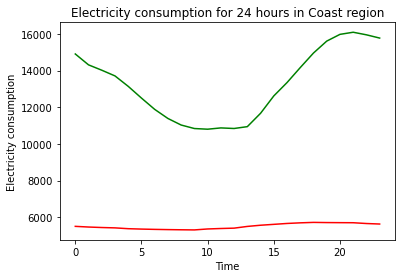

In [100]:
plt.plot(actual_electricity_load_inverse[0:24,0], color='green', label = 'Real electricity consumption')
plt.plot(predicted_electricity_load_inverse[0:24,0], color='red', label = 'Predicted electricity consumption')
plt.title('Electricity consumption for 24 hours in Coast region')
plt.xlabel('Time')
plt.ylabel('Electricity consumption')
plt.show()

## Related content 

1. [Data analysis in Python using pandas](https://developer.ibm.com/tutorials/data-analysis-in-python-using-pandas/)
1. [Get started with machine learning](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/)
1. [Get started with deep learning](https://developer.ibm.com/series/get-started-with-deep-learning/)